In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
user = pd.read_csv('user_table.csv')
home = pd.read_csv('home_page_table.csv')
search = pd.read_csv('search_page_table.csv')
payment = pd.read_csv('payment_page_table.csv')
confirmation = pd.read_csv('payment_confirmation_table.csv')

In [3]:
data = user.merge(home, how='left', on='user_id').merge(search, how='left', on='user_id').merge(payment, how='left', 
       on='user_id').merge(confirmation, how='left', on='user_id')
data.columns = ['user_id','date','device','sex','home','search','payment','confirmation']
data['home'] = 1
data.loc[data['search'].notnull(),'search'] = 1
data.loc[data['search'].isnull(),'search'] = 0
data.loc[data['payment'].notnull(),'payment'] = 1
data.loc[data['payment'].isnull(),'payment'] = 0
data.loc[data['confirmation'].notnull(),'confirmation'] = 1
data.loc[data['confirmation'].isnull(),'confirmation'] = 0

# Full picture of the funnel

In [106]:
data_agg = data.groupby(['device']).agg({"home":sum, "search":sum, "payment":sum, "confirmation":sum})

In [107]:
values = data_agg.values.reshape(8,1).ravel()
stage = ["home","search","payment","confirmation"]*2
device = ["Desktop"]*4 + ["Mobile"]*4

data_funnel = pd.DataFrame({"device":device, "stage":stage, "values":values})

**Something might be off in the payment and confirmation page for the desktop version. Because the two devices have almost exact conversion rate from the home page to the search page, but the divergence appeared from the search page to the payment page and stayed to the confirmation page.**

In [108]:
import plotly.express as px

stages = ['hoem', 'search', 'payment', 'confirmation']
fig = px.funnel(data_funnel, x='values', y='stage', color='device')
fig.show()

# Insights on improving conversion rate

In [109]:
data['date'] = pd.to_datetime(data['date'])
data['day_of_week'] = data['date'].apply(lambda x: x.strftime('%A'))
data['confirmation'] = data['confirmation'].astype(int)

**Female customers should be focused more as they are most likely to convert compare to the males.**

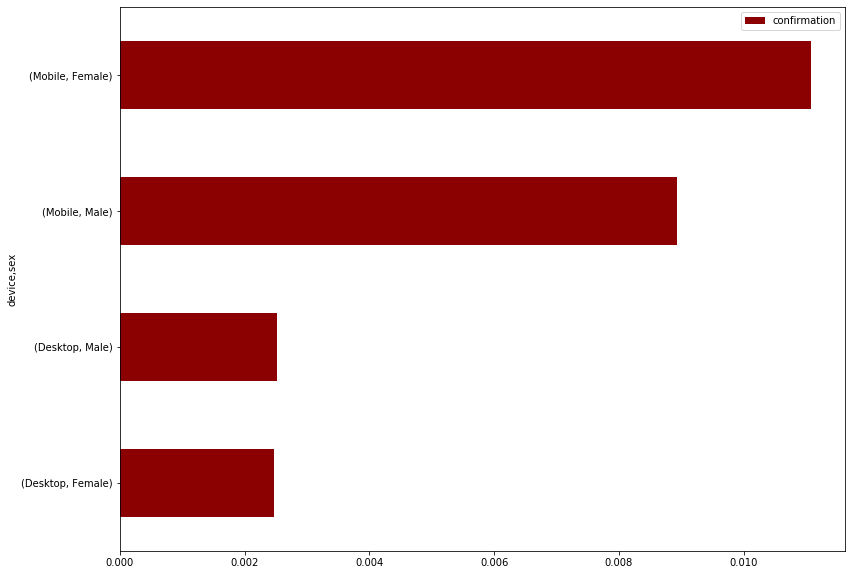

In [132]:
grouper = data.groupby(['device', 'sex']).agg({"confirmation": 'mean'})
fig, ax = plt.subplots(figsize=(13, 10))
grouper.sort_values('confirmation').plot(kind='barh', ax=ax, color='darkred');

**No doubt that the moblie platform deserves more resources, interestingly, mobile users seem to be more active Monday as they generated the highest conversion rate. Weekend is not bad option either, for the desktop version, weekend or weekdays does not make as much difference as in the mobile devices.**

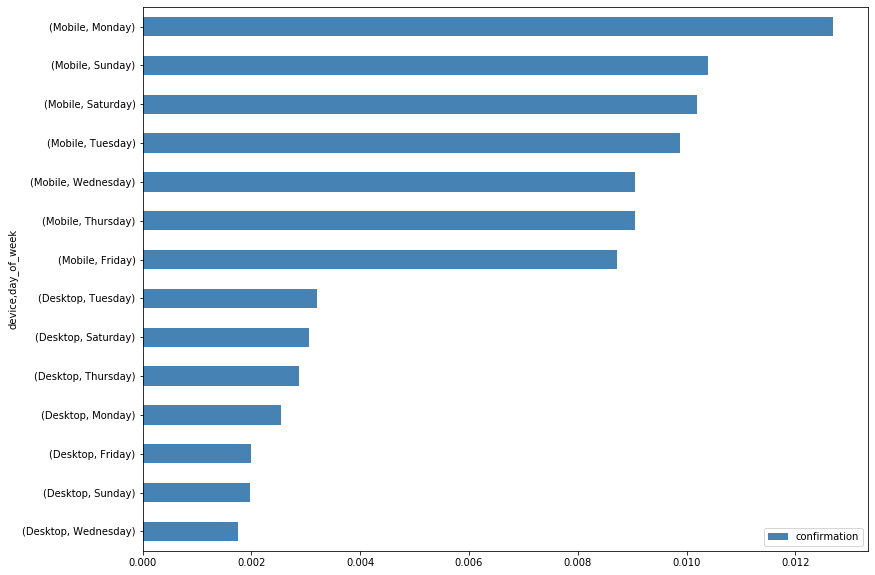

In [134]:
grouper = data.groupby(['device', 'day_of_week']).agg({"confirmation": 'mean'})
fig, ax = plt.subplots(figsize=(13, 10))
grouper.sort_values('confirmation').plot(kind='barh', ax=ax, color='steelblue');